<a href="https://colab.research.google.com/github/Haila-Abdullah/RDP-health-and-obesity-trends/blob/master/Projec_Sloutiont.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/68886973-eca24380-06f6-11ea-8327-3e9a22e22b43.png"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

### Project

# Health and Obesity trends

Let's put in practice the topics covered in the course and analyze health and obesity trends.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on!

In [ ]:
import pandas as pd
import numpy as np
import sqlite3
import requests

%matplotlib inline

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Read the dump of `USDA Food Composition Database` into a `food_df` DataFrame variable.

The National Nutrient Database (NNDB) is provided by the [USDA](https://ndb.nal.usda.gov/ndb/) to allow the public to get standardized information on foods. They document the database and all supporting information on the USDA website.

> Although the file format says "txt", we call these plain CSVs files and read it using `read_csv` method. Be aware of parsing correctly `NaN` values, data separator, encoding, quotechar and any other parsing option you think necessary.

Here's a preview of that file:

In [ ]:
!head /content/FOOD_DES.txt

~01001~^~0100~^~Butter, salted~^~BUTTER,WITH SALT~^^^~Y~^^0^^6.38^4.27^8.79^3.87
~01002~^~0100~^~Butter, whipped, with salt~^~BUTTER,WHIPPED,W/ SALT~^^^~Y~^^0^^6.38^^^
~01003~^~0100~^~Butter oil, anhydrous~^~BUTTER OIL,ANHYDROUS~^^^~Y~^^0^^6.38^4.27^8.79^3.87
~01004~^~0100~^~Cheese, blue~^~CHEESE,BLUE~^^^~Y~^^0^^6.38^4.27^8.79^3.87
~01005~^~0100~^~Cheese, brick~^~CHEESE,BRICK~^^^~Y~^^0^^6.38^4.27^8.79^3.87
~01006~^~0100~^~Cheese, brie~^~CHEESE,BRIE~^^^~Y~^^0^^6.38^4.27^8.79^3.87
~01007~^~0100~^~Cheese, camembert~^~CHEESE,CAMEMBERT~^^^~Y~^^0^^6.38^4.27^8.79^3.87
~01008~^~0100~^~Cheese, caraway~^~CHEESE,CARAWAY~^^^^^0^^6.38^4.27^8.79^3.87
~01009~^~0100~^~Cheese, cheddar (Includes foods for USDA's Food Distribution Program)~^~CHEESE,CHEDDAR~^^^~Y~^^0^^^^^
~01010~^~0100~^~Cheese, cheshire~^~CHEESE,CHESHIRE~^^^^^0^^6.38^4.27^8.79^3.87


The column names are taken from the original documentation for this dataset.

> Use the given column names while reading the data.

In [ ]:
column_names = ['NDB_No', 'FdGrp_Cd', 'Long_Desc', 'Shrt_Desc', 'ComName',
                'ManufacName', 'Survey', 'Ref_desc', 'Refuse', 'SciName',
                'N_Factor', 'Pro_Factor', 'Fat_Factor', 'CHO_Factor']

In [ ]:
# your code goes here

food_df=pd.read_csv('/content/FOOD_DES.txt',
                    names=column_names,
                    header=None,
                    sep='^',
                    quotechar='~')
food_df.head()

,NDB_No,FdGrp_Cd,Long_Desc,Shrt_Desc,ComName,ManufacName,Survey,Ref_desc,Refuse,SciName,N_Factor,Pro_Factor,Fat_Factor,CHO_Factor
0,1001,100,"Butter, salted","BUTTER,WITH SALT",NaN,NaN,Y,NaN,0.0,NaN,6.38,4.27,8.79,3.87
1,1002,100,"Butter, whipped, with salt","BUTTER,WHIPPED,W/ SALT",NaN,NaN,Y,NaN,0.0,NaN,6.38,NaN,NaN,NaN
2,1003,100,"Butter oil, anhydrous","BUTTER OIL,ANHYDROUS",NaN,NaN,Y,NaN,0.0,NaN,6.38,4.27,8.79,3.87
3,1004,100,"Cheese, blue","CHEESE,BLUE",NaN,NaN,Y,NaN,0.0,NaN,6.38,4.27,8.79,3.87
4,1005,100,"Cheese, brick","CHEESE,BRICK",NaN,NaN,Y,NaN,0.0,NaN,6.38,4.27,8.79,3.87


How many products do we have?

In [ ]:
# your code goes here
food_df.shape[0]


2429

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Variables distribution

Analyze how values are distributed:

- Create an histogram of `Refuse` variable.
- Create a boxplot of `N_Factor` variable.

<Axes: ylabel='Frequency'>

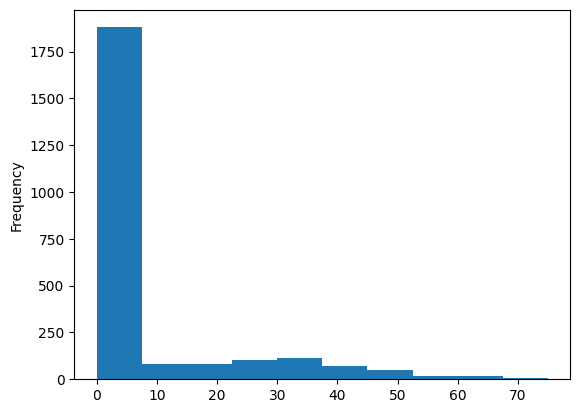

In [ ]:
# your code goes here
food_df['Refuse'].plot(kind='hist')

<Axes: >

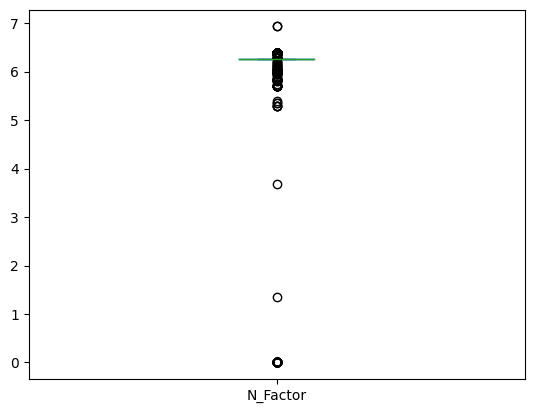

In [ ]:
# your code goes here
food_df['N_Factor'].plot(kind='box')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which are the top-10 food manufacturers with more products on `food_df`.

In [ ]:
# your code goes here

food_df['ManufacName'].value_counts()[:10]

,count
ManufacName,
"The Quaker Oats, Co.",71
MEAD JOHNSON,40
MOM Brands,31
ABBOT NUTRTION,26
"Post Foods, LLC",21
"Kraft Foods, Inc.",18
Chobani,17
"B&G Foods, Inc",13
GERBER,12


Also create a bar plot showing that results.

<Axes: xlabel='ManufacName'>

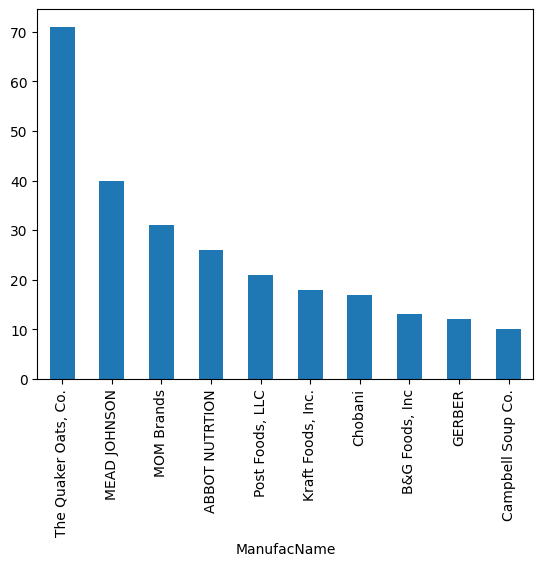

In [ ]:
# your code goes here
food_df['ManufacName'].value_counts()[:10].plot(kind='bar')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Analyzing Starbucks nutrition facts

Starbucks is an American coffee chain founded in Seattle. It serves both beverages and food.

<img width="650" alt="Starbucks" src="https://user-images.githubusercontent.com/7065401/68891327-57f01380-06ff-11ea-8461-eb35ba0c3bb0.png">

We'll analyze the nutritional information for Starbucks’ drink menu items using this [Nutrition facts for Starbucks drinks](https://www.kaggle.com/starbucks/starbucks) data. All nutritional information for drinks are for a 12oz serving size.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Getting Starbucks' drinks information

- Create an sqlite3 connection to the `starbucks.db` SQLite3 database.
- Read from the `drinks` table just the items with more than 100 calories and save them to a `drinks_df` DataFrame variable.

In [ ]:
# your code goes here
conn= sqlite3.connect('/content/starbucks.db')
drinks_df= pd.read_sql('SELECT * FROM drinks WHERE Calories>100',conn)
conn.close()

drinks_df.head(10)

,Item,Calories,Fat,Carb,Fiber,Protein,Sodium
0,Evolution Fresh™ Organic Ginger Limeade,110.0,0.0,28.0,0.0,0.0,5.0
1,Iced Espresso Classics - Vanilla Latte,130.0,2.5,21.0,0.0,5.0,65.0
2,Iced Espresso Classics - Caffe Mocha,140.0,2.5,23.0,0.0,5.0,90.0
3,Iced Espresso Classics - Caramel Macchiato,130.0,2.5,21.0,0.0,5.0,65.0
4,Tazo® Bottled Black Mango,150.0,0.0,38.0,0.0,0.0,15.0
5,Tazo® Bottled Black with Lemon,140.0,0.0,35.0,0.0,0.0,10.0
6,Tazo® Bottled Brambleberry,140.0,0.0,35.0,0.0,0.0,15.0
7,Tazo® Bottled Giant Peach,150.0,0.0,37.0,0.0,0.0,15.0
8,Tazo® Bottled Lemon Ginger,120.0,0.0,31.0,0.0,0.0,10.0
9,Tazo® Bottled Organic Black Lemonade,140.0,0.0,35.0,0.0,0.0,10.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which is the item with the highest calories?

In [ ]:
# your code goes here
max_calories = drinks_df['Calories'].max()
max_calories_item = drinks_df.loc[drinks_df['Calories'] == max_calories]
max_calories_item

,Item,Calories,Fat,Carb,Fiber,Protein,Sodium
31,Starbucks® Signature Hot Chocolate,430.0,26.0,45.0,5.0,12.0,115.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Create two groups of items: "`less or equal 150 calories`" and "`more 150 calories`"

In [ ]:
# your code goes here

less_equal_150_cal = drinks_df[drinks_df['Calories']<=150]

less_equal_150_cal.head()

,Item,Calories,Fat,Carb,Fiber,Protein,Sodium
0,Evolution Fresh™ Organic Ginger Limeade,110.0,0.0,28.0,0.0,0.0,5.0
1,Iced Espresso Classics - Vanilla Latte,130.0,2.5,21.0,0.0,5.0,65.0
2,Iced Espresso Classics - Caffe Mocha,140.0,2.5,23.0,0.0,5.0,90.0
3,Iced Espresso Classics - Caramel Macchiato,130.0,2.5,21.0,0.0,5.0,65.0
4,Tazo® Bottled Black Mango,150.0,0.0,38.0,0.0,0.0,15.0


In [ ]:
# your code goes here

more_150_cal = drinks_df[drinks_df['Calories']>150]

more_150_cal.head()

,Item,Calories,Fat,Carb,Fiber,Protein,Sodium
17,Starbucks® Doubleshot Protein Dark Chocolate,210.0,2.5,33.0,2.0,20.0,115.0
18,Starbucks® Doubleshot Protein Vanilla,200.0,2.5,34.0,2.0,20.0,120.0
30,Hot Chocolate,320.0,9.0,47.0,4.0,14.0,160.0
31,Starbucks® Signature Hot Chocolate,430.0,26.0,45.0,5.0,12.0,115.0
32,Caffè Latte,190.0,7.0,19.0,0.0,13.0,170.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Compare item characteristics

Create a `compare_groups()` function that compares a given field of both groups of data, `less_equal_150_cal` and `more_150_cal`, by showing two overlapped histograms.

- You should use different colors per histogram. Also add a little bit of opacity (use `alpha=0.4`).
- The function MUST check that the given field exists, and raise `ValueError` with a "Field not found" message otherwise.


In [ ]:
# your code goes here

def compare_groups(field):
    if (field in less_equal_150_cal.columns):
        less_equal_150_cal[field].plot(kind='hist', color='blue', alpha=0.4, title=field)
        more_150_cal[field].plot(kind='hist', color='red', alpha=0.4)
    else:
        raise ValueError(f"Field '{field}' not found")

Validate your function showing a comparison of the `Calories` per group.

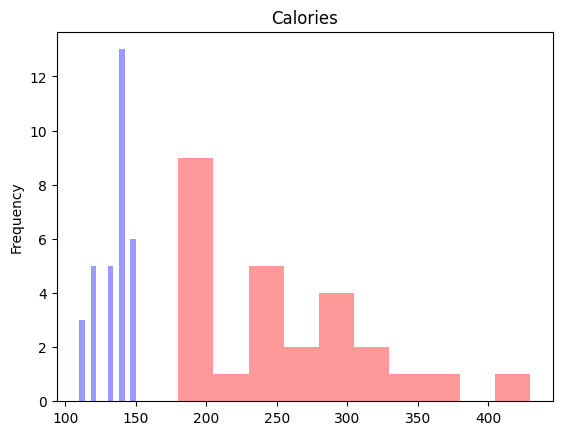

In [ ]:
# your code goes here

compare_groups('Calories')

Now answer: **Less Calories implies less Sodium?**

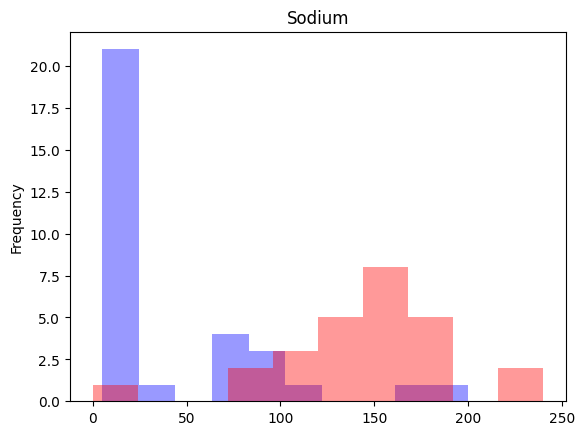

In [ ]:
# your code goes here
compare_groups('Sodium')

**Less Calories implies less Carbs?**

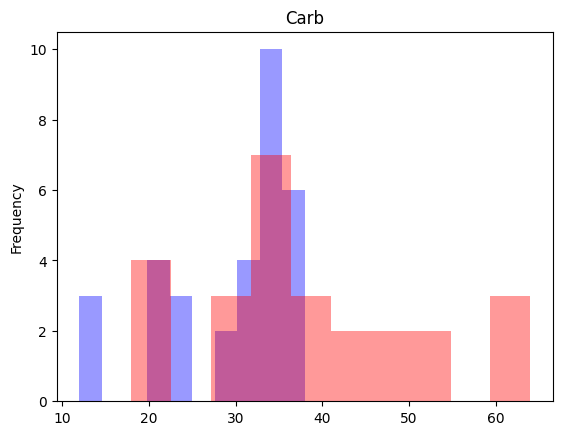

In [ ]:
# your code goes here
compare_groups('Carb')

**Less Calories implies less Proteins?**

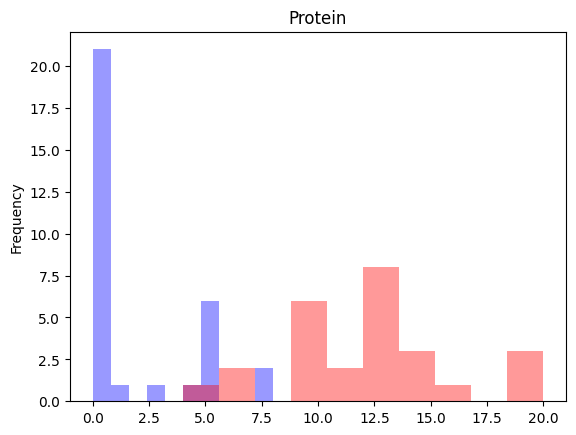

In [ ]:
# your code goes here
compare_groups('Protein')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Healthy diet interest

In order to measure interest on healthy diets, we'll analyze how many pageviews the article `Healthy diet` received during the last years.

![Food-piramid](https://user-images.githubusercontent.com/7065401/68880286-bf02cd80-06e9-11ea-8d42-ff6dbb539f7d.png)

To get pageviews from Wikipedia, we'll need to use the _Analytics API_. Here you can find [the documentation](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews) to get pageviews from an article.

To get monthly pageviews for a given article, you can use the following endpoint:

```
https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/{ARTICLE}/monthly/{START}/{END}
```

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get data from Wikipedia using its API

Make a request to Wikipedia API to get monthly page views for `Healthy_diet` article from year 2015 (`2015010100`) to 2019 (`2019100100`).

Store the response in a `pageviews_df` DataFrame variable.

In [ ]:
url = "https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Healthy_diet/monthly/2015010100/2019100100"

In [ ]:
# your code goes here
resp = requests.get(url)
dict_json = resp.json()

pageviews_df = pd.DataFrame.from_dict(dict_json['items'])

pageviews_df.head()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### When was the highest search peak?

Save in a `max_pageviews_str` variable the date where `Healthy_diet` article had the highest volume of page views.

Also save a `max_pageview_date` with that previous value parsed to `datetime`.

In [ ]:
# your code goes here

max_pageviews_df = pageviews_df.loc[pageviews_df['views'] == pageviews_df['views'].max()]

max_pageviews_str = max_pageviews_df['timestamp'].values[0]
print(max_pageviews_str)

max_pageviews_date = pd.to_datetime(max_pageviews_str, format='%Y%m%d%H')
print(max_pageviews_date)

We can draw a quick plot showing the evolution of `views` per month:

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(pageviews_df['timestamp'], pageviews_df['views'])

plt.axvline(x=max_pageviews_str, color='green')

plt.xticks(rotation=90)
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get more data from Wikipedia API

Create a `get_pageviews_count()` function that receives a variable number **article names** as argument, and returns a dictionary with the sum of pageviews during 2018 for each of these article names.

- The function MUST check that at least one parameter is found, and raise a `ValueError` otherwise.

```
https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/{ARTICLE}/monthly/2018010100/2018123100
```

In [ ]:
# your code goes here

def get_pageviews_count(*args):
    if (not len(args)):
        raise ValueError('No article names found')

    dict = {}

    for article_name in args:
        url = f'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/{article_name}/monthly/2018010100/2018123100'

        resp = requests.get(url)

        dict_json = resp.json()

        article_df = pd.DataFrame.from_dict(dict_json['items'])

        dict[article_name] = article_df['views'].sum()

    return dict

Calling `get_pageviews_count('Healthy_diet', 'Food', 'Obesity')` should return something like:

```
{'Healthy_diet': 478712, 'Food': 1125874, 'Obesity': 1092577}
```

In [ ]:
get_pageviews_count('Healthy_diet', 'Food', 'Obesity')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Obesity trends in the USA

Obesity in the United States is a major health issue, resulting in numerous diseases, specifically increased risk of certain types of cancer, coronary artery disease, type 2 diabetes, stroke, as well as significant increases in early mortality and economic costs.

Let's analyze obesity trends on each state of the USA. To do that take a look at the _Obesity in the United States_ Wikipedia article where they analyze obesity revalence by state and territory.

<img width="500" alt="Obesity-trends" src="https://user-images.githubusercontent.com/7065401/68873389-5a8e4100-06de-11ea-844c-5ec622af5caa.png">

In [ ]:
url = 'https://en.wikipedia.org/wiki/Obesity_in_the_United_States'

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Read the HTML table at the end of the article into a `obesity_df` DataFrame object.

> Be aware of parsing correctly `NaN` values that appear as `—` characters.

<img width="450" alt="Obesity-table" src="https://user-images.githubusercontent.com/7065401/68880373-e5286d80-06e9-11ea-9bd0-f59ffcf02341.png">

In [ ]:
# your code goes here
obesity_df = pd.read_html(url, na_values='—')[1]

obesity_df.columns = [
    'States',
    'Obesity Rank',
    'Obese Adults (%)',
    'Overweight (incl. Obese) Adults (mid-2000s)',
    'Obese Children and Adolescents (mid-2000s)',
    'Obese Children and Adolescents (%)'
]

obesity_df.head()

,States,Obesity Rank,Obese Adults (%),Overweight (incl. Obese) Adults (mid-2000s),Obese Children and Adolescents (mid-2000s),Obese Children and Adolescents (%)
0,Alabama,5.0,30.1%,36.3%,65.4%,16.7%
1,Alaska,9.0,27.3%,34.2%,64.5%,11.1%
2,American Samoa,NaN,NaN,75%[96],95%[99],35%[96][100]
3,Arizona,30.0,23.3%,29.5%,59.5%,12.2%
4,Arkansas,7.0,28.1%,35.0%,64.7%,16.4%


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Sort the states by _Obesity rank_ and get the 5 states at the top. Show name and obesity rank.

In [ ]:
# your code goes here

top_5_obesity = obesity_df.sort_values('Obesity Rank').iloc[:5, [0, 5]]

top_5_obesity

,States,Obese Children and Adolescents (%)
53,West Virginia,20.9%
26,Mississippi,17.8%
39,Oklahoma,15.4%
17,Iowa,12.5%
0,Alabama,16.7%


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)